In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("data/ev_data.csv")

In [3]:
print(df.shape)

(478, 22)


In [4]:
display(df.head())

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [6]:
df.isnull().sum()

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
top_speed_kmh,478.0,185.487448,34.252773,125.0,160.0,180.00,201.00,325.0
battery_capacity_kWh,478.0,74.043724,20.331058,21.3,60.0,76.15,90.60,118.0
number_of_cells,276.0,485.293478,1210.819733,72.0,150.0,216.00,324.00,7920.0
torque_nm,471.0,498.012739,241.461128,113.0,305.0,430.00,679.00,1350.0
efficiency_wh_per_km,478.0,162.903766,34.317532,109.0,143.0,155.00,177.75,370.0
range_km,478.0,393.179916,103.287335,135.0,320.0,397.50,470.00,685.0
acceleration_0_100_s,478.0,6.882636,2.730696,2.2,4.8,6.60,8.20,19.1
fast_charging_power_kw_dc,477.0,125.008386,58.205012,29.0,80.0,113.00,150.00,281.0
towing_capacity_kg,452.0,1052.261062,737.851774,0.0,500.0,1000.00,1600.00,2500.0
seats,478.0,5.263598,1.003961,2.0,5.0,5.00,5.00,9.0


In [8]:
for col in df.select_dtypes('object'):
    print(f"{col}: {df[col].nunique()} unique → {df[col].unique()[:5]}")

brand: 59 unique → ['Abarth' 'Aiways' 'Alfa' 'Alpine' 'Audi']
model: 477 unique → ['500e Convertible' '500e Hatchback' '600e Scorpionissima' '600e Turismo'
 'U5']
battery_type: 1 unique → ['Lithium-ion']
fast_charge_port: 2 unique → ['CCS' 'CHAdeMO' nan]
cargo_volume_l: 140 unique → ['185' '360' '496' '472' '400']
drivetrain: 3 unique → ['FWD' 'RWD' 'AWD']
segment: 15 unique → ['B - Compact' 'JB - Compact' 'JC - Medium' 'JE - Executive' 'JD - Large']
car_body_type: 8 unique → ['Hatchback' 'SUV' 'Station/Estate' 'Liftback Sedan' 'Sedan']
source_url: 478 unique → ['https://ev-database.org/car/1904/Abarth-500e-Convertible'
 'https://ev-database.org/car/1903/Abarth-500e-Hatchback'
 'https://ev-database.org/car/3057/Abarth-600e-Scorpionissima'
 'https://ev-database.org/car/3056/Abarth-600e-Turismo'
 'https://ev-database.org/car/1678/Aiways-U5']


In [1]:
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [6]:
corr = df.corr(numeric_only=True)

In [7]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

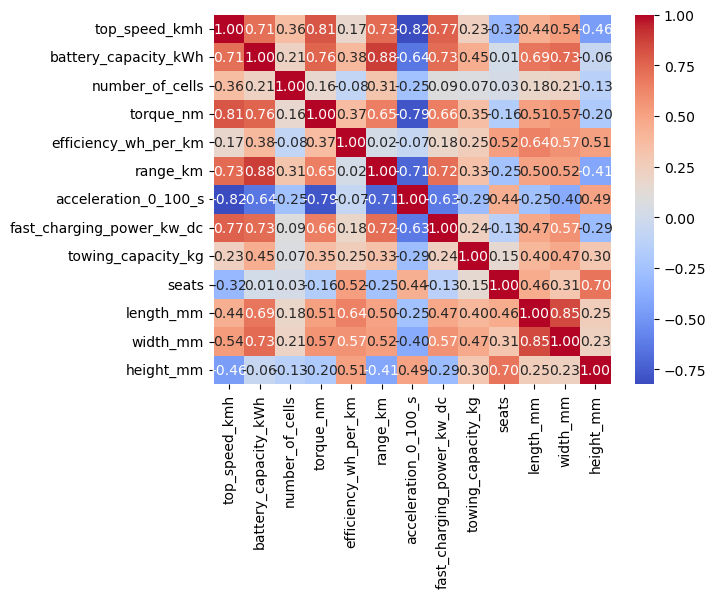

In [8]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

Text(0.5, 1.0, 'Correlation Heatmap')

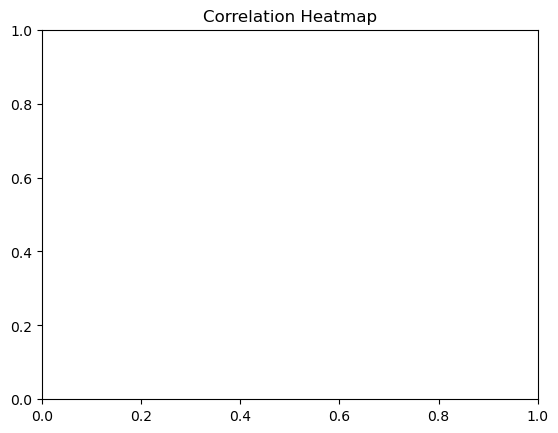

In [9]:
plt.title("Correlation Heatmap")

In [10]:
plt.show()

In [11]:
corr["range_km"].sort_values(ascending=False)

range_km                     1.000000
battery_capacity_kWh         0.880433
top_speed_kmh                0.732130
fast_charging_power_kw_dc    0.720932
torque_nm                    0.651651
width_mm                     0.521392
length_mm                    0.496867
towing_capacity_kg           0.333962
number_of_cells              0.311014
efficiency_wh_per_km         0.022943
seats                       -0.248784
height_mm                   -0.413798
acceleration_0_100_s        -0.712486
Name: range_km, dtype: float64

In [12]:
numeric_cols = ['battery_capacity_kWh','top_speed_kmh','efficiency_wh_per_km','acceleration_0_100_s','torque_nm','range_km']

array([[<Axes: title={'center': 'battery_capacity_kWh'}>,
        <Axes: title={'center': 'top_speed_kmh'}>],
       [<Axes: title={'center': 'efficiency_wh_per_km'}>,
        <Axes: title={'center': 'acceleration_0_100_s'}>],
       [<Axes: title={'center': 'torque_nm'}>,
        <Axes: title={'center': 'range_km'}>]], dtype=object)

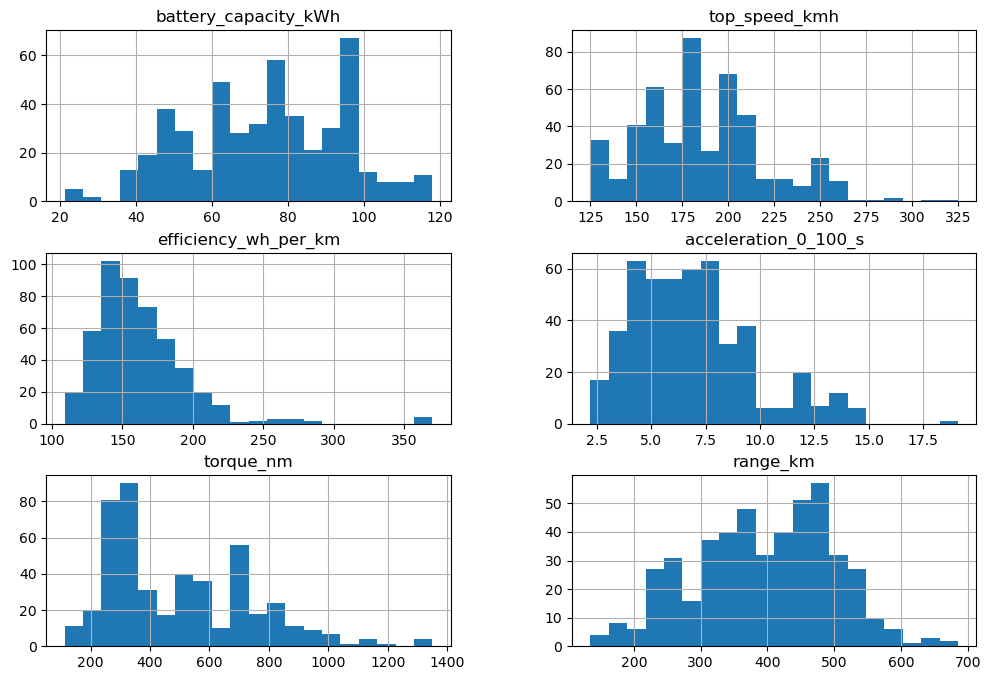

In [13]:
df[numeric_cols].hist(bins=20, figsize=(12,8))

In [14]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [15]:
plt.show()

<Axes: xlabel='battery_capacity_kWh', ylabel='range_km'>

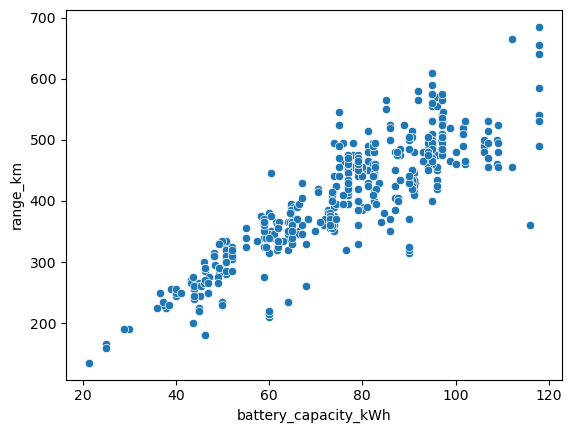

In [16]:
sns.scatterplot(x='battery_capacity_kWh', y='range_km', data=df)

Text(0.5, 1.0, 'Battery Capacity vs Range')

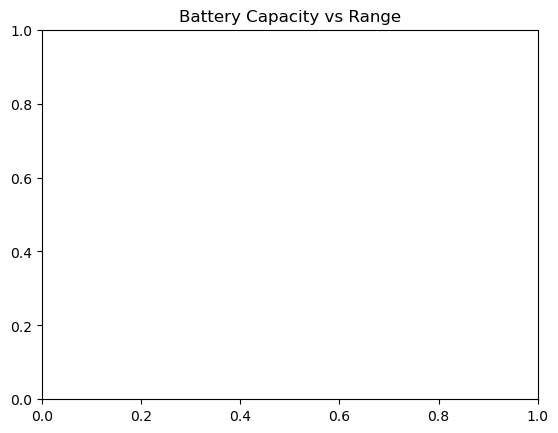

In [17]:
plt.title("Battery Capacity vs Range")

In [18]:
plt.show()

In [19]:
df = df.drop(["brand", "model", "source_url"], axis=1)

In [20]:
df.isnull().sum()

top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
dtype: int64

In [21]:
df = df.drop("number_of_cells", axis=1)

In [22]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

In [23]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [24]:
cat_cols = df.select_dtypes(include=["object"]).columns

In [25]:
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [26]:
df.isnull().sum()

top_speed_kmh                0
battery_capacity_kWh         0
battery_type                 0
torque_nm                    0
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
fast_charge_port             0
towing_capacity_kg           0
cargo_volume_l               0
seats                        0
drivetrain                   0
segment                      0
length_mm                    0
width_mm                     0
height_mm                    0
car_body_type                0
dtype: int64

In [27]:
df = pd.get_dummies(df, drop_first=True)

In [28]:
X = df.drop("range_km", axis=1)

In [29]:
y = df["range_km"]

In [30]:
X.shape, y.shape

((478, 174), (478,))

In [31]:
df.to_csv("data/ev_data_cleaned.csv", index=False)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Columns: 175 entries, top_speed_kmh to car_body_type_Station/Estate
dtypes: bool(163), float64(5), int64(7)
memory usage: 121.0 KB


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
top_speed_kmh,478.0,185.487448,34.252773,125.0,160.0,180.00,201.00,325.0
battery_capacity_kWh,478.0,74.043724,20.331058,21.3,60.0,76.15,90.60,118.0
torque_nm,478.0,497.016736,239.822348,113.0,310.0,430.00,679.00,1350.0
efficiency_wh_per_km,478.0,162.903766,34.317532,109.0,143.0,155.00,177.75,370.0
range_km,478.0,393.179916,103.287335,135.0,320.0,397.50,470.00,685.0
acceleration_0_100_s,478.0,6.882636,2.730696,2.2,4.8,6.60,8.20,19.1
fast_charging_power_kw_dc,478.0,124.983264,58.146563,29.0,80.0,113.00,150.00,281.0
towing_capacity_kg,478.0,1049.418410,717.558948,0.0,500.0,1000.00,1600.00,2500.0
seats,478.0,5.263598,1.003961,2.0,5.0,5.00,5.00,9.0
length_mm,478.0,4678.506276,369.210573,3620.0,4440.0,4720.00,4961.00,5908.0


In [34]:
import matplotlib.pyplot as plt

In [35]:
numeric_cols = ['battery_capacity_kWh', 'top_speed_kmh', 'efficiency_wh_per_km',
                'acceleration_0_100_s', 'torque_nm', 'fast_charging_power_kw_dc', 'range_km']

array([[<Axes: title={'center': 'battery_capacity_kWh'}>,
        <Axes: title={'center': 'top_speed_kmh'}>,
        <Axes: title={'center': 'efficiency_wh_per_km'}>],
       [<Axes: title={'center': 'acceleration_0_100_s'}>,
        <Axes: title={'center': 'torque_nm'}>,
        <Axes: title={'center': 'fast_charging_power_kw_dc'}>],
       [<Axes: title={'center': 'range_km'}>, <Axes: >, <Axes: >]],
      dtype=object)

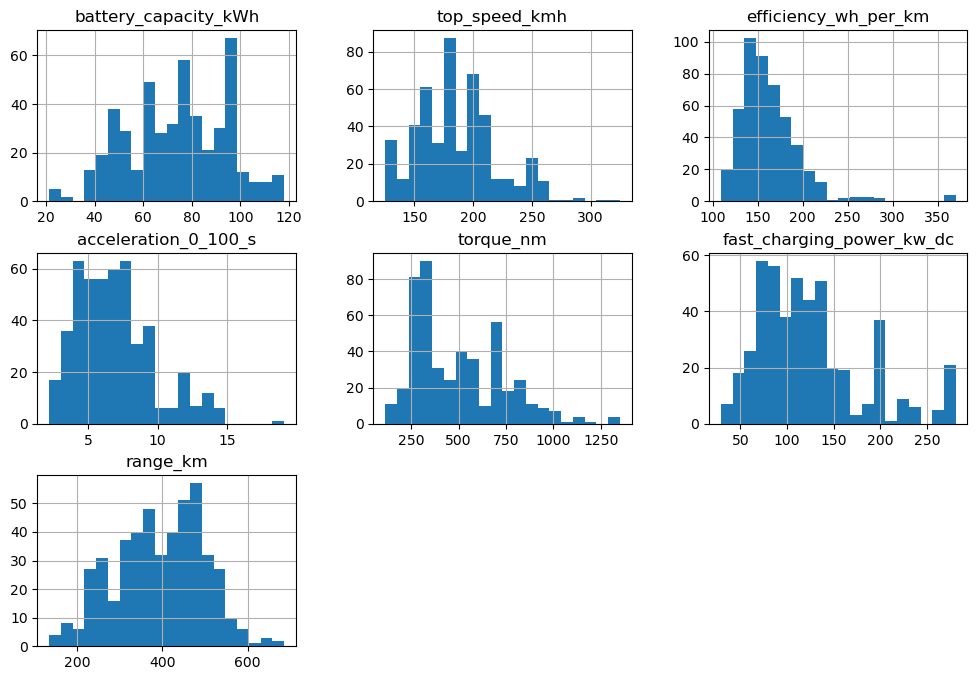

In [36]:
df[numeric_cols].hist(bins=20, figsize=(12,8))

In [37]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [38]:
plt.show()

In [39]:
import seaborn as sns

In [40]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

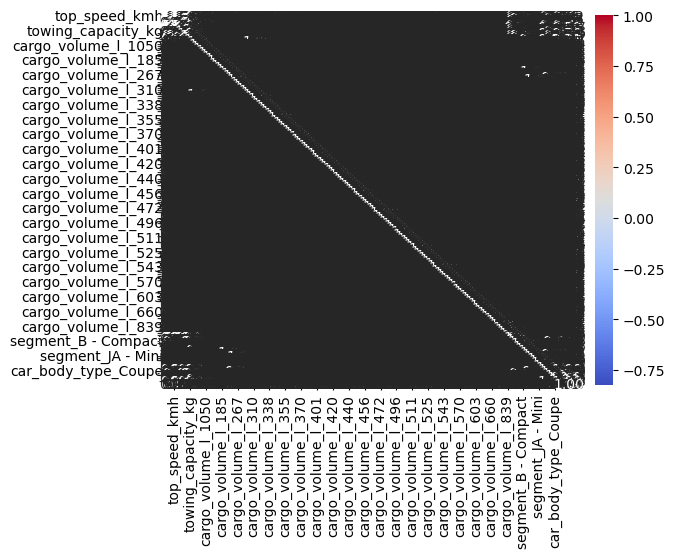

In [41]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

Text(0.5, 1.0, 'Correlation Heatmap of EV Features')

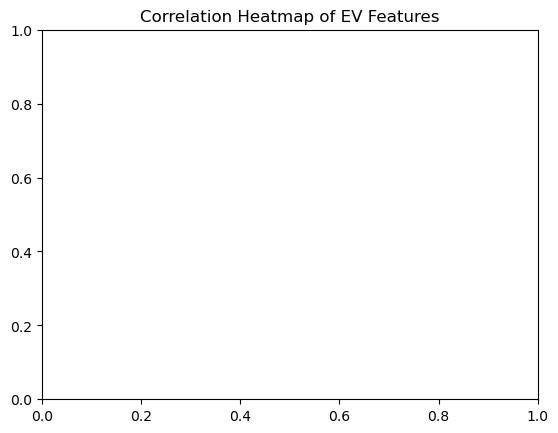

In [42]:
plt.title("Correlation Heatmap of EV Features")

In [43]:
plt.show()

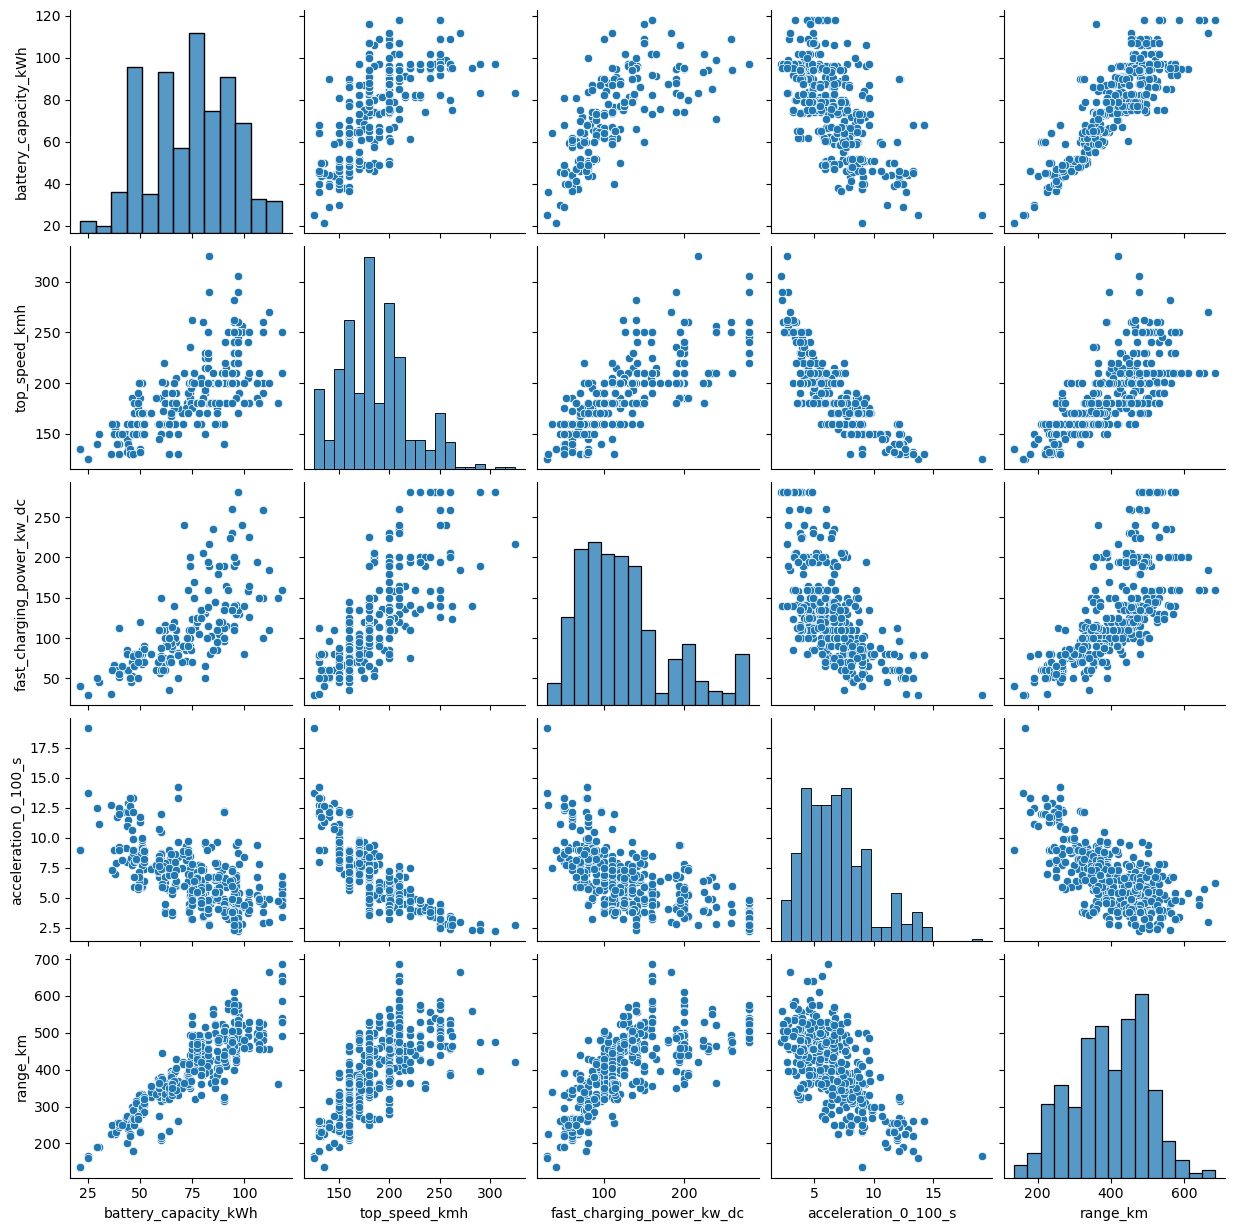

In [44]:
sns.pairplot(df, vars=['battery_capacity_kWh', 'top_speed_kmh',
                       'fast_charging_power_kw_dc', 'acceleration_0_100_s', 'range_km'])